# Movie Production Data Analysis and Plan


The aim of this report is the presenation of a plan which maximises the chances of success of the production of a profitable movie. 
Formulation of the plan requires data relating to movies all around the world. The data has been extracted from a reputable online database named IMDB. The data will be analysed and recommendations will be made based on a thorough understanding of the characteristics which have made movies successful in the past.

In [1]:
#standard imports for when working with pandas
import numpy as np

#import for statistics to be checked
import scipy.stats as stats
import pylab

#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

#Import Seaborn
import seaborn as sns

#read the movie metadata file into a dataframe in pandas.
moviesdata = 'movie_metadata.csv'
dfmovies = pd.read_csv(moviesdata,index_col=None)


It is important to first gain an understanding of the data available. In other words, the columns contained, the data types within the column and even an understanding of how the data is collected. To do this, I visited he IMDB site, explored and gathered information from pages such as this https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#. 

In [2]:
#Viewed information about the data using the code below.
#An important observation is that there are 5043 records howver, non-Null counts are below this for most columns.

#print(dfmovies.info())

In [3]:
#To gain some knowledge of the contents of the table, view the top 20 grossing movies.

#(dfmovies.sort_values(by = 'gross', ascending=False)).head(20)  

In [4]:
dfmovies.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Movies can be categorised as successful if they have managed they gross value is above their budget. A new column will be created. Success. will be measured as gross divided by budget, therefore, values above 1 will be an inidcators of a successful movie.

In [5]:
#A new column called 'success' has been created. This column contains the calculation 'gross' divided by budget.

dfmovies['success']=dfmovies['gross']/dfmovies['budget']
dfmovies.head(1) #View the top record and scroll to view the success column.

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,success
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,3.208885


Below, a brief exploration of the relationship between success and imdb scores is carried out.The jointplot below shows no clear relationship between success and IMDB scores. However, the distrubution of IMDB scores is roughly normal, whereas the distribution of success values is unknown. 

For this reason, further visualisations and a Shapiro-Wilks test are created/conductucted to determine if success is normally distributed. The results of the test mean that the null hypothesis is rejected as the p value is below the chosen significance level of 0.05. There is no evidence the success values are normally distributed. This will inform future tests to inviestigate the significance of measures of averages. 

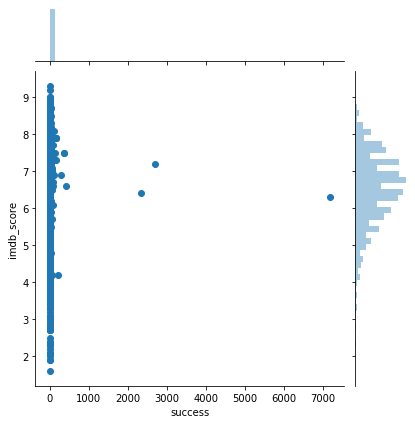

In [6]:
#The plot below shows no clear relationship between success and 
sns.jointplot(x='success', y='imdb_score', data =dfmovies)

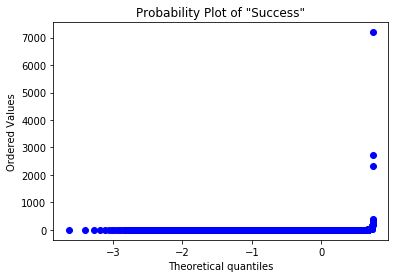

In [96]:
#Create a probablity plot of the success values to roughly view normality if it exists in the data.
stats.probplot(dfmovies['success'], dist = "norm", plot =pylab)
plt.title(label ='Probability Plot of "Success"')
plt.savefig('Probability of "Success"')


In [8]:
#Complete a Shapiro-Wilks test for normality on the list of success values.
x = dfmovies['success'].dropna()
stats.shapiro(x)

(0.016257286071777344, 0.0)

In [9]:
withinbudget = dfmovies[dfmovies['budget']<1500000]
country_success = withinbudget[['country', 'success']]
countrysuccesscount = country_success.groupby(by='country').count().reset_index('country')


bigcountrycount = countrysuccesscount[countrysuccesscount['success']> 10]

# Results will be skewed by results from countries with a low number of movies.
# In this exploration 20 movies will be considered big.

bigcountrycount

,country,success
27,UK,19
28,USA,201


In [10]:
USA_countrysuccess = withinbudget[withinbudget['country']=='USA'] # Create a dataframe in which only movies made in the USA within budget are visible.

mean = USA_countrysuccess['success'].mean() #Calculate the mean success value within the dataframe.
standarddeviation = USA_countrysuccess['success'].std() #Calulate the standard deviation from the mean
mode = USA_countrysuccess['success'].mode() #Although the mode is calculated, it is not printed below. The metric is not helpful.
median = USA_countrysuccess['success'].median() # Calculate the median success value of the dataframe.

print('The mean, median and standard deviation of success are {}, {} and {} respectively.'.format(mean,median,standarddeviation))

The mean, median and standard deviation of success are 83.0341210057612, 2.3832958333333334 and 565.8455140624545 respectively.


Text(0.5, 1.0, 'Boxplot of success values for movies produced in USA')

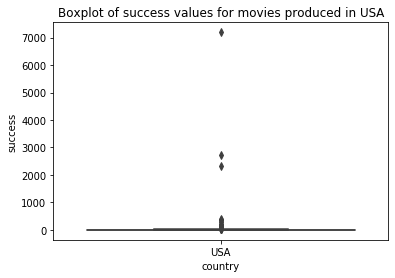

In [11]:
#Create a boxplot of the success values for movies in the USA produced with a similar budget or less.

sns.boxplot(data=USA_countrysuccess, x='country', y='success')
plt.title(label='Boxplot of success values for movies produced in USA')

The values produced (above) for the mean, median and standard deviation suggests that the data is spreads from the mean greatly and not clustered in a region. However, an attempt to visualise this data returns a plot which gives a different impression. It gives the impression that the data is in fact clustered around the median and outliers may be skewing results.

In [12]:
#Calculate the mean success values for each language.
USA_countrysuccess[['language', 'success']].groupby(by='language')['success'].mean()

language
English    83.066346
Spanish    98.596063
Name: success, dtype: float64

In [13]:
#Calculate the median success values for each language.
USA_countrysuccess[['language', 'success']].groupby(by='language')['success'].median()

language
English    2.343358
Spanish    4.224997
Name: success, dtype: float64

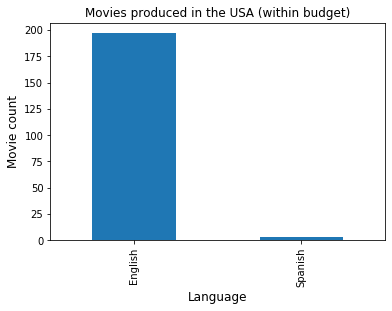

In [110]:
#Count the number of movies made in each language.
USA_countrysuccesscount = USA_countrysuccess[['language', 'success']].groupby(by='language')['success'].count()
USA_countrysuccesscount.plot(kind='bar',x='language')
plt.title(label='Movies produced in the USA (within budget)', fontsize=12)
plt.xlabel ('Language', fontsize=12)
plt.ylabel('Movie count', fontsize=12)
plt.savefig('Movie Barplot Count')
plt.xticks(fontsize=10)
plt.savefig('movie count plot')

In [15]:
USA_countrysuccesscount

language
English    197
Spanish      3
Name: success, dtype: int64

The spanish movies have a higher mean and median (for success) and, as mentioned previously,the median appears to be a more reliable measure of central tendency to use. The medians for movies produced in english and spanish are above one, therefore, on average, movies made in both languages are successful.

However, there are 81 english movies made in the USA within budget in the development sample while only 3 are spanish. There is simply not enough data within the subset of movies, spanish movies within budget produced in the USA, to draw meaningful conclusions.

As such, further analysis will centre english movies. The next factor to be considered is the effect of directors on success.

Below, the number of movies made by each director in english, within budget and in the USA is counted. The list is then narrowed down to directors who have produced more than 2 successful movies. Once again, success is defined as a success value (gross/budget) above 1.

In [36]:
USA_success_eng = USA_countrysuccess[USA_countrysuccess['language']=='English'] #Create a dataframe which includes all movies produced in the USA within budget using the english language.
directorseries = USA_success_eng[['director_name', 'success']] #Keep only the director name and success columns.

directorcount = directorseries.groupby(by='director_name')['success'].count().reset_index('director_name') #Group the data by director name and count the frequency in which directors appear in the dataframe.

directormedian = directorseries.groupby(by='director_name')['success'].median().reset_index('director_name') #Group the data by director name and calculate the median of their success values.

director_median_count = pd.merge(left = directorcount, right = directormedian, on = 'director_name' ) #Merge the two dataframes.

director_median_count.columns = ['director_name', 'movie_count', 'success_median'] #Rename the columns to provide more information at a glance.
director_median_count

#Limit the directors to those who have produced more than 2 successful movies in english in the USA.
bigdirector = director_median_count[(director_median_count['movie_count']>1)& (director_median_count['success_median']>1)]
bigdirector


,director_name,movie_count,success_median
7,Alex Kendrick,2,84.324794
46,Charles Herman-Wurmfeld,2,3.771845
87,Edward Burns,2,205.186667
107,Greg Harrison,2,1.752640
123,Jamie Babbit,2,1.128375
146,John Carpenter,5,156.666667
153,Jon Gunn,2,38.880596
163,Justin Lin,2,7.651528
168,Kelly Reichardt,2,2.567942
174,Kevin Smith,2,30.863311


John Carpenter is the only director who has produced more than one (1) english movies in the USA with a budget of 1.5million or less. On average, his movies gross 90 times the the budgets allowed.

The task completed below is an investigation of the genre of movies in which he is most successful. The Mann-Whitney U test was used to determine whether the the values differ significantly.This is because, as established previously, the success values are not normally distrbuted. A significance value of 5% (0.05) will be used for all tests.

The result is that the null hypothesis must be accepted; there is no significant difference between the success values for the movies produced by John Carpenter within budget for each genre.

However, further investigation has shown that 2 out of 4 records are duplicates! There is not enough data to confirm John Carpenter directs the most successful english in the USA for any genre.

The same method, Mann-Whitney U test, was used to determine if the success values for Horror and and Horror|Thriller genres are significantly different enough to recommend one. Unfortunately, the null hypothesis must be accepted with an alpha

In [88]:
USA_success_engJC = USA_success_eng[USA_success_eng['director_name']=='John Carpenter'] #Create a dataframe of movies in which meet the budget, language and location criteria and in which Jorn Carpenter is the only director.
USA_success_engJC  #View the movies produced in the USA within budget in the english languge by John Carpenter

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,success
2420,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,21.378000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,156.666667
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,156.666667
4532,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,21.378000
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,156.666667


In [18]:
USA_success_engJCGenre = USA_success_engJC[['director_name', 'genres', 'success']] #Create a dataframe limited to the three named columns which meet the aforementioned criteria.
USA_success_engJCGenreMedians = USA_success_engJCGenre.groupby(by='genres').median() #Calculate the median success values for each genre John Carpenter has produced movies for within the set parameters.
USA_success_engJCGenreMedians 

,success
genres,
Fantasy|Horror,21.378000
Horror|Thriller,156.666667


In [19]:
HorrorThriller = USA_success_engJC[USA_success_engJC['genres']=='Horror|Thriller']
HorrorThrillerdata = HorrorThriller['success'] #exract an array of success values for movies in this specific genre (horror|thriller).

FantasyHorror = USA_success_engJC[USA_success_engJC['genres']=='Fantasy|Horror']
FantasyHorrordata =FantasyHorror['success'] #(Repeat)exract an array of success values for movies in this specific genre(Fantasy|Horror).

#Test to determine if the differences in the success values for John Carpenter in the arrays above are statistically significant.
stats.mannwhitneyu(x=HorrorThrillerdata  , y = FantasyHorrordata) 

MannwhitneyuResult(statistic=0.0, pvalue=0.0477903522728147)

In [20]:
#The values in the rows for John Carpenter appear to be duplications. 
#A thorough check has revealed that they are!


#JohnCarp1 = USA_success_engJC.loc[3717]
#JohnCarp1   #Use this code to view the record at row 3443

#JohnCarp2 = USA_success_engJC.loc[4080]
#JohnCarp2   #Use this code to view the record at row 3698

Below, the effect of genre on success for movies produced in the USA in english within budget is explored. As mentioned above, the values are not normally distributed. Therefore the Mann-Whitney U test is used to test for significance.

In [66]:
genreseries = USA_success_eng[['genres', 'success']] #Keep only the genres and success columns.

genrescount = genreseries.groupby(by='genres')['success'].count().reset_index('genres') #Group the data by genre and count the frequency in which directors appear in the dataframe.


genresmedian = genreseries.groupby(by='genres')['success'].median().reset_index('genres') #Group the data by director name and calculate the median of their success values.

genre_median_count = pd.merge(left = genrescount, right = genresmedian, on = 'genres' ) #Merge the two dataframes.

genre_median_count.columns = ['genres', 'movie_count', 'success_median'] #Rename the columns to provide more information at a glance.
genre_median_count

#Limit the genres with more than 2 successful movies in english in the USA.
biggenre = genre_median_count[(genre_median_count['movie_count']>5)& (genre_median_count['success_median']>1)]
biggenre.columns = ['Genre', 'Movie Count', 'Success Median']
biggenre.sort_values(by= 'Success Median', ascending=False)


,Genre,Movie Count,Success Median
128,Horror|Thriller,6,192.122428
121,Horror,6,35.615527
57,Comedy|Drama|Romance,15,7.022940
53,Comedy|Drama,16,3.028276
95,Drama,18,2.872273
88,Documentary,12,1.355270


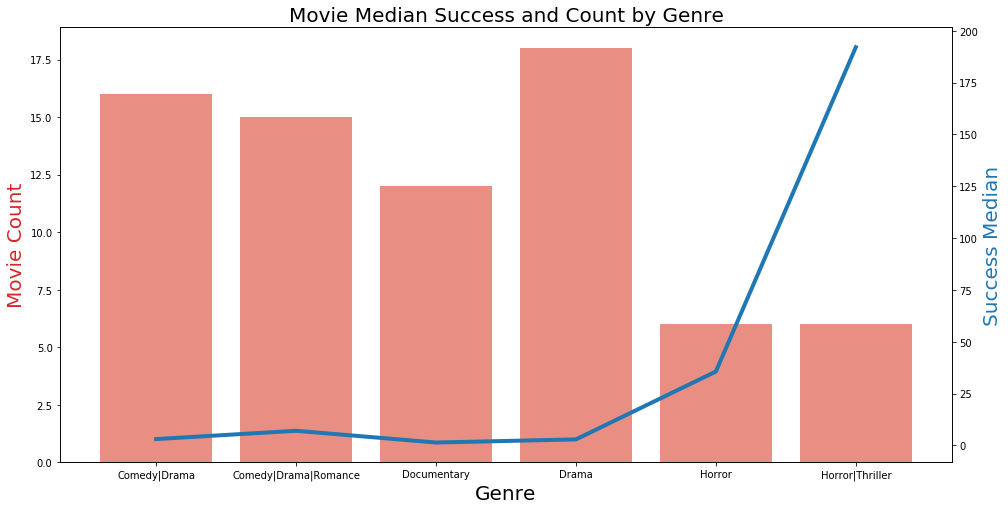

In [117]:
fig, ax1 = plt.subplots(figsize=(16,8))
color = 'tab:red'
ax1.set_title('Movie Median Success and Count by Genre', fontsize=20)
ax1.set_xlabel('Genre', fontsize=20)
ax1.set_ylabel('Movie Count', fontsize=20, color=color)
ax2 = sns.barplot(x='Genre', y='Movie Count', data = biggenre, color='salmon')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Success Median', fontsize=20, color=color)
ax2 = sns.lineplot(x='Genre', y='Success Median', data = biggenre, lw=4)
ax2.set_xlabel('Genre', fontsize=16)
plt.savefig('count + success')

In [84]:
genreHorror = USA_success_eng[USA_success_eng['genres']=='Horror']
genreHorrordata = genreHorror['success'] 

genreHorrorThriller = USA_success_eng[USA_success_eng['genres']=='Horror|Thriller']
genreHorrorThrillerdata =genreHorrorThriller['success']


stats.mannwhitneyu(x=genreHorrorThrillerdata  , y = genreHorrordata) 

MannwhitneyuResult(statistic=69.0, pvalue=0.3528636919684308)

In [118]:
genreDrama = USA_success_eng[USA_success_eng['genres']=='Drama']
genreDramadata = genreDrama['success'] 

genreComdedyDramaRomance = USA_success_eng[USA_success_eng['genres']=='Comedy|Drama|Romance']
genreComedyDramaRomancedata =genreComdedyDramaRomance['success']


stats.mannwhitneyu(x=genreDramadata  , y = genreComedyDramaRomancedata) 

MannwhitneyuResult(statistic=234.0, pvalue=0.26593581703138586)

In [87]:
stats.mannwhitneyu(x=genreDramadata  , y = genreHorrorThrillerdata) 

MannwhitneyuResult(statistic=102.0, pvalue=0.11532784514293881)

Repeat with test sample

# Summary

The purpose of this analysis is the production of a an action plan for a successful movie within the budget of 1.5million.

A successful movie was defined as one which generates more gross income than the budget assigned. The IMDB data was examined for relationships between the factors documented and success.


I examined the whether there was a relationship between success and IMDB ratings. I found that there was no clear relationship between the two. Next, the relationship between language and success was explored. It was uncovered that only one location, the USA, is the location in which a large number of movies are produced according to the data. Most movies in the USA are in the english language, data is insufficient for other languages.Further investigation into the effect of director name and genre revealed results which could not be relied upon due to the sample size.


Based on the data analyses, I could recommend that the studio produce a movie in the USA in english. The data available is insufficient to recommend a director or genre.
